# Clustering 

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
all_orders = pd.read_csv('orders_allinfo_second.csv')
all_orders.head()

,Unnamed: 0,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,aisle,department_id,department,order_hour_of_day,order_dow
0,0,202279,2,33120,1,1,Organic Egg Whites,86,eggs,16,dairy eggs,9,5
1,1,202279,2,28985,2,1,Michigan Organic Kale,83,fresh vegetables,4,produce,9,5
2,2,202279,2,9327,3,0,Garlic Powder,104,spices seasonings,13,pantry,9,5
3,3,202279,2,45918,4,1,Coconut Butter,19,oils vinegars,13,pantry,9,5
4,4,202279,2,30035,5,0,Natural Sweetener,17,baking ingredients,13,pantry,9,5


In [5]:
all_orders = all_orders.drop(['Unnamed: 0'],axis=1)

In [6]:
all_orders.isna().sum()

user_id              0
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
product_name         0
aisle_id             0
aisle                0
department_id        0
department           0
order_hour_of_day    0
order_dow            0
dtype: int64

## Using Aisle to Cluster

As there are a almost 50.000 different products, I decided to cluster using the 134 aisles we have. The aisles group the projects in type and is therefore a more summarized view and will make the analysis less heavy and easier to interpet. I'll therefore use a crosstab for customers and the number of products they purchased in every aisle. 

In [10]:
all_orders['product_name'].nunique()

49677

In [7]:
cross_aisle = pd.crosstab(all_orders['user_id'], all_orders['aisle'])
cross_aisle.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [9]:
cross_aisle.shape

(206209, 134)

In [14]:
#there are no NaN values
nulls = [column for column in cross_aisle if cross_aisle[column].isna().sum()!=0]
nulls

[]

### PCA

In [ ]:
# As there are a lot of columns now I will use PCA to reduce the amount of variables in order to improve the ability to see trends and to create clusters
# it will also help with reducing dimensionality and speeding up my clustering algorithm

In [18]:
#normalize data so I can use it in PCA
transformer = StandardScaler()
aisle_scaled = transformer.fit_transform(cross_aisle)
aisle_scaled = pd.DataFrame(aisle_scaled,columns=cross_aisle.columns)
aisle_scaled

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,-0.132137,-0.331369,-0.074269,-0.112044,-0.166422,-0.152402,-0.414774,-0.199890,-0.109956,-0.077704,...,-0.117240,-0.227445,-0.189294,-0.331042,-0.132684,-0.204075,-0.197966,-0.361938,-0.084979,-0.328440
1,-0.132137,0.899033,-0.074269,-0.112044,-0.166422,-0.152402,0.108839,-0.199890,-0.109956,-0.077704,...,0.463976,-0.039344,0.112188,-0.331042,-0.132684,-0.204075,-0.197966,-0.184560,-0.084979,1.899905
2,-0.132137,-0.331369,-0.074269,-0.112044,-0.166422,-0.152402,-0.414774,-0.199890,-0.109956,-0.077704,...,0.754584,-0.039344,-0.189294,-0.331042,-0.132684,-0.204075,-0.197966,-0.184560,-0.084979,-0.382790
3,-0.132137,-0.331369,-0.074269,-0.112044,-0.166422,-0.152402,-0.414774,-0.199890,-0.109956,-0.077704,...,-0.407848,-0.227445,-0.189294,0.022113,-0.132684,-0.204075,-0.197966,-0.273249,-0.084979,-0.382790
4,-0.132137,0.488899,-0.074269,-0.112044,-0.166422,-0.152402,-0.414774,-0.199890,-0.109956,-0.077704,...,-0.407848,-0.227445,-0.189294,-0.331042,-0.132684,-0.204075,-0.197966,-0.361938,-0.084979,-0.219740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,-0.132137,-0.331369,1.802555,-0.112044,-0.166422,-0.152402,-0.414774,-0.199890,-0.109956,-0.077704,...,-0.407848,-0.227445,-0.189294,-0.331042,-0.132684,-0.204075,-0.197966,-0.361938,-0.084979,-0.111040
206205,-0.132137,1.309168,-0.074269,-0.112044,-0.166422,-0.152402,0.632452,1.539902,-0.109956,-0.077704,...,-0.117240,-0.227445,-0.189294,-0.331042,-0.132684,1.107670,-0.197966,-0.273249,-0.084979,-0.382790
206206,-0.132137,-0.331369,-0.074269,-0.112044,-0.076692,-0.152402,-0.414774,-0.199890,-0.109956,-0.077704,...,0.463976,0.524957,-0.189294,0.375269,0.636088,-0.204075,-0.197966,0.613643,-0.084979,0.432458
206207,-0.132137,0.899033,-0.074269,-0.112044,0.102768,-0.152402,0.632452,-0.199890,-0.109956,-0.077704,...,1.045191,-0.227445,-0.189294,2.141046,-0.132684,-0.204075,-0.197966,-0.361938,-0.084979,1.410756


In [50]:
#normalize using share of total

aisle_share = cross_aisle.div(cross_aisle.sum(axis=1), axis=0)
aisle_share.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.016949,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.016949
2,0.0,0.015385,0.0,0.0,0.0,0.0,0.010256,0.0,0.0,0.0,...,0.015385,0.005128,0.005128,0.000000,0.0,0.0,0.0,0.010256,0.0,0.215385
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.045455,0.011364,0.000000,0.000000,0.0,0.0,0.0,0.022727,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000
5,0.0,0.054054,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.081081


In [53]:
from sklearn.decomposition import PCA
pca_share = PCA(n_components = 0.95)
principalComponents_share = pca_share.fit_transform(aisle_share)

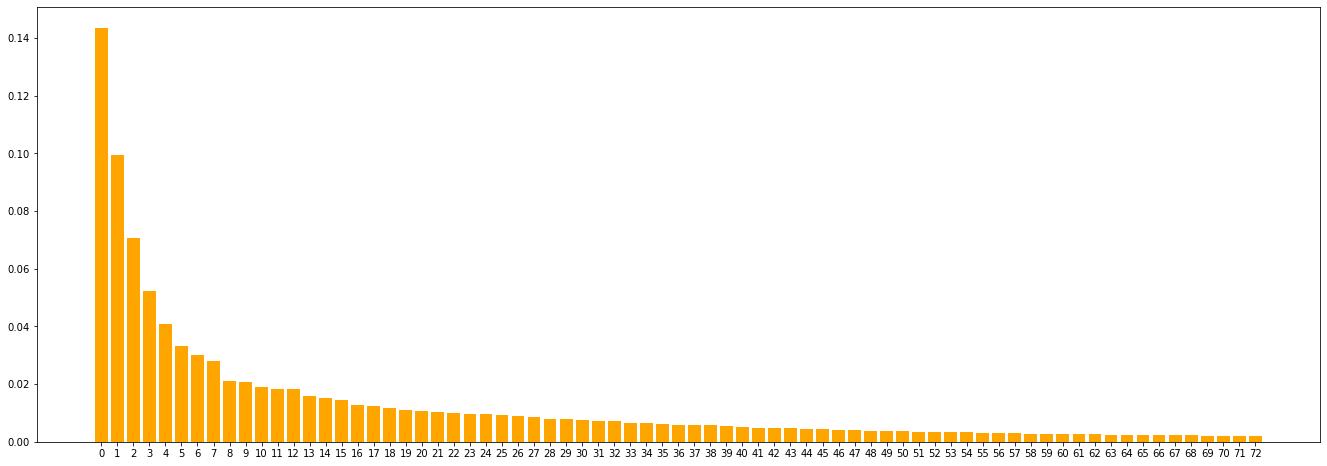

In [55]:
plt.figure(figsize=(23,8))
features_share = range(pca_share.n_components_)
plt.bar(features_share, pca_share.explained_variance_ratio_, color = 'orange')
plt.xticks(features_share)

PCA_components_share = pd.DataFrame(principalComponents_share)

In [96]:
PCA_components_share[[0,1,2,3,4]]

,0,1,2,3,4
0,-0.113443,0.039084,-0.042863,0.018865,-0.088341
1,-0.036988,0.108884,-0.066406,-0.123271,0.098849
2,0.064282,0.103962,0.000710,-0.012221,-0.046984
3,-0.093210,0.054093,0.001867,-0.003974,-0.071356
4,0.094629,-0.037051,-0.024952,-0.021575,0.055369
...,...,...,...,...,...
206204,-0.026367,0.027732,-0.067101,-0.033285,0.118231
206205,-0.089921,-0.045631,-0.048018,0.012692,-0.060298
206206,-0.024815,-0.013314,-0.003664,-0.031273,0.032279
206207,-0.009370,-0.003186,-0.045535,-0.012414,0.013405


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

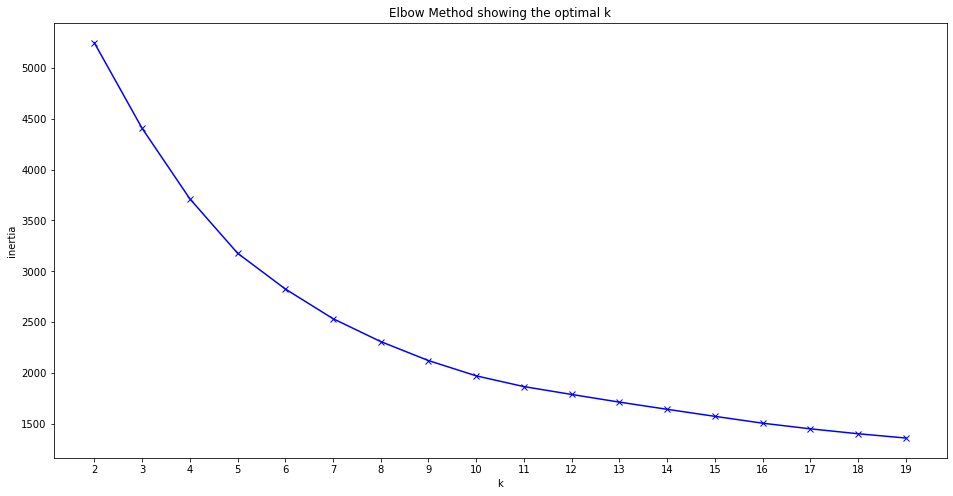

In [109]:
from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []
labels = {}

for k in K:
    kmeans_share = KMeans(n_clusters=k).fit(PCA_components_share[[0,1,2,3,4]])
    inertia.append(kmeans_share.inertia_)
    labels[k] = kmeans_share.labels_

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [110]:
kmeans = KMeans(n_clusters=6, random_state=1234).fit(PCA_components_2[[0,1,2,3,4]])

cluster_labels = kmeans.labels_
cluster_labels
# clusters = kmeans.predict(PCA_components_2[[0,1,2,3,4]])
# pd.Series(clusters).value_counts().sort_index()

array([0, 5, 0, ..., 5, 1, 5], dtype=int32)

In [114]:
cluster_df = pd.concat([PCA_components_share[[0,1,2,3,4]],pd.Series(cluster_labels).rename('cluster')],axis=1)

In [115]:
cluster_df

,0,1,2,3,4,cluster
0,-0.113443,0.039084,-0.042863,0.018865,-0.088341,0
1,-0.036988,0.108884,-0.066406,-0.123271,0.098849,5
2,0.064282,0.103962,0.000710,-0.012221,-0.046984,0
3,-0.093210,0.054093,0.001867,-0.003974,-0.071356,0
4,0.094629,-0.037051,-0.024952,-0.021575,0.055369,0
...,...,...,...,...,...,...
206204,-0.026367,0.027732,-0.067101,-0.033285,0.118231,0
206205,-0.089921,-0.045631,-0.048018,0.012692,-0.060298,5
206206,-0.024815,-0.013314,-0.003664,-0.031273,0.032279,5
206207,-0.009370,-0.003186,-0.045535,-0.012414,0.013405,1


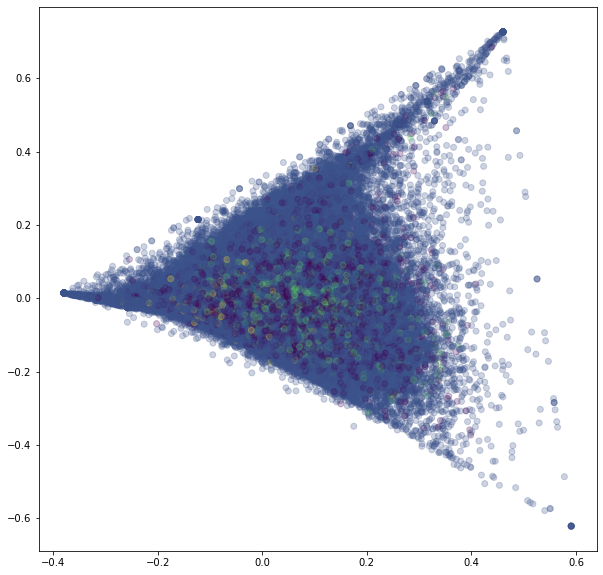

In [116]:
plt.figure(figsize=(10, 10))
plt.scatter(cluster_df[0], cluster_df[1], c=clusters,alpha=0.25)
plt.show()

In [121]:
cluster_aisle_share = pd.concat([PCA_components_share[[0,1,2,3,4]],pd.Series(labels[6]).rename('cluster')], axis = 1)

In [125]:
cluster_aisle_share

,0,1,2,3,4,cluster
0,-0.113443,0.039084,-0.042863,0.018865,-0.088341,2
1,-0.036988,0.108884,-0.066406,-0.123271,0.098849,0
2,0.064282,0.103962,0.000710,-0.012221,-0.046984,5
3,-0.093210,0.054093,0.001867,-0.003974,-0.071356,2
4,0.094629,-0.037051,-0.024952,-0.021575,0.055369,1
...,...,...,...,...,...,...
206204,-0.026367,0.027732,-0.067101,-0.033285,0.118231,0
206205,-0.089921,-0.045631,-0.048018,0.012692,-0.060298,2
206206,-0.024815,-0.013314,-0.003664,-0.031273,0.032279,0
206207,-0.009370,-0.003186,-0.045535,-0.012414,0.013405,0


In [122]:
cluster_aisle_share['cluster'].value_counts()

2    68447
0    66456
1    45600
5    12882
3     7765
4     5059
Name: cluster, dtype: int64

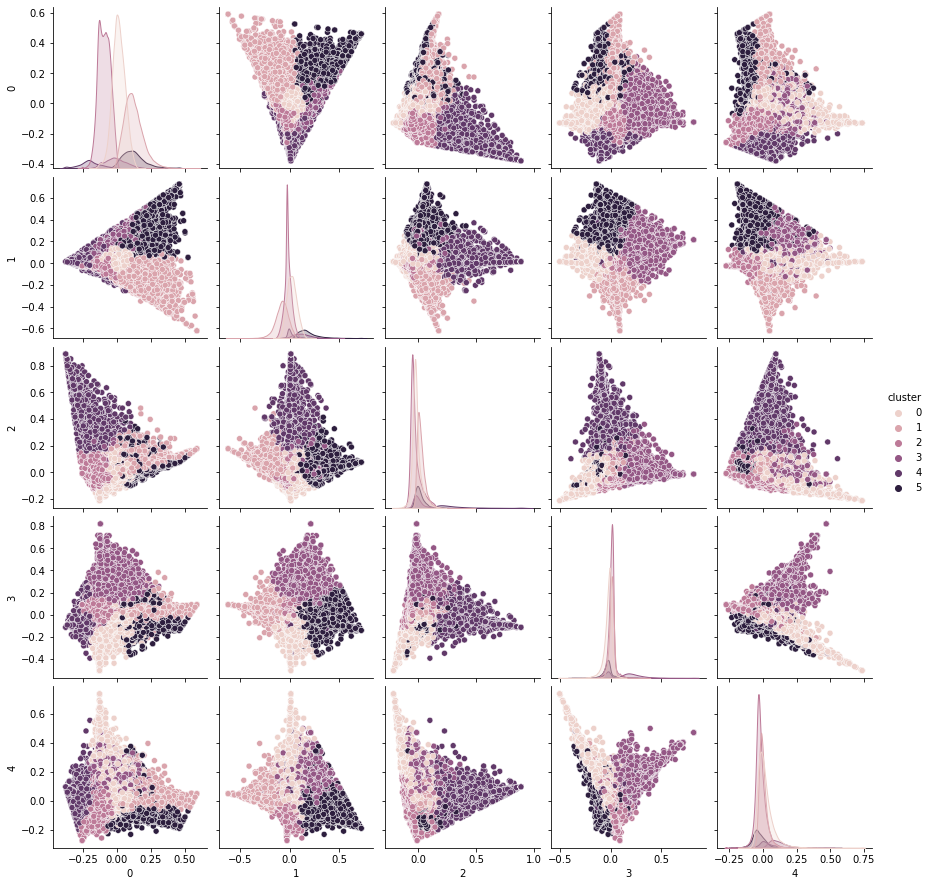

In [123]:
sns.pairplot(cluster_aisle_share, hue = 'cluster')

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
principalComponents = pca.fit_transform(aisle_scaled)

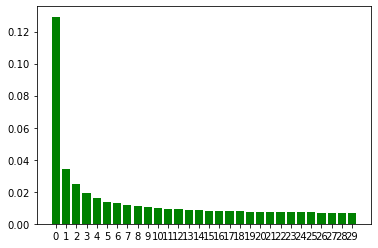

In [22]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color = 'green')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [32]:
print('Explained variation per PC: {}'.format(pca.explained_variance_ratio_))
print('Sum Explained var:', pca.explained_variance_ratio_.sum())
print('% information lost:', (1-pca.explained_variance_ratio_.sum()))

Explained variation per PC: [0.12924873 0.03441598 0.02471893 0.01893149 0.01582005 0.01376114
 0.01294641 0.01170342 0.01127539 0.01051026 0.01007771 0.00934824
 0.00912949 0.0086042  0.00836897 0.00811568 0.00799891 0.00790894
 0.0077801  0.00764495 0.00755692 0.00743312 0.00731783 0.00728302
 0.00716795 0.00705687 0.00698889 0.00690577 0.00687766 0.00680387]
Sum Explained var: 0.43970088226825255
% information lost: 0.5602991177317475


In [ ]:
# looking at the plot above we can see that the first 4 PCA differ the most until it evens out. For this reason I will use 4 PCA 

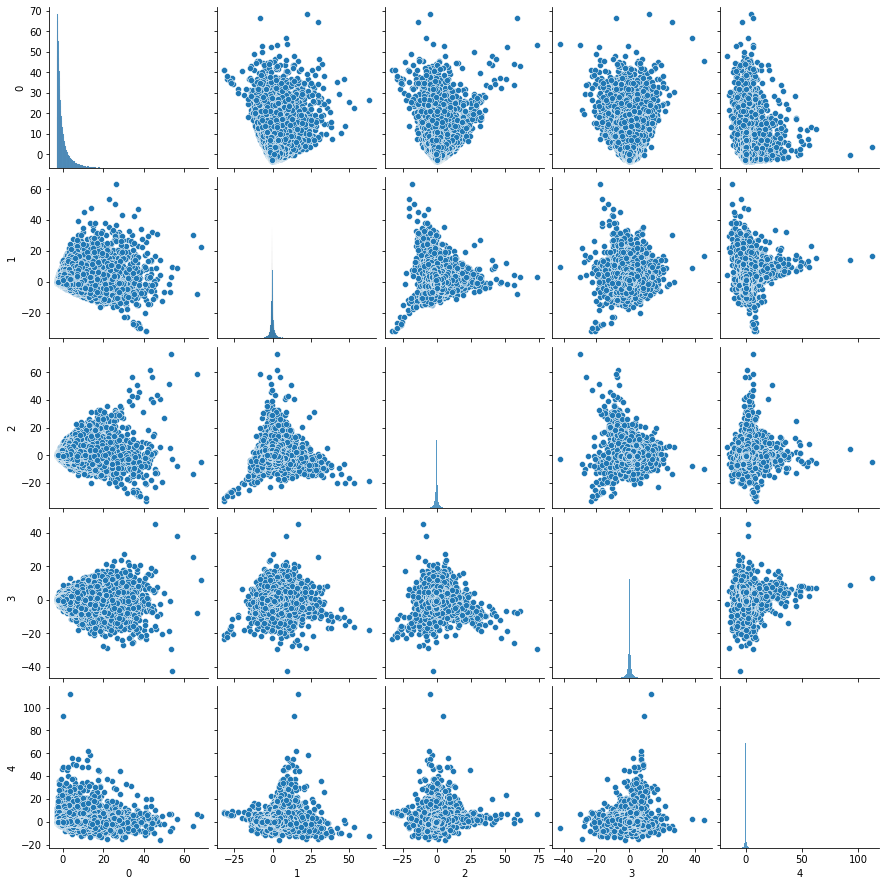

In [35]:
sns.pairplot(PCA_components[[0,1,2,3,4]])

In [24]:
PCA_components

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.091064,0.393773,1.409008,-0.163603,0.288045,-0.409404,-0.817035,0.537244,0.846755,0.910241,...,0.034854,0.417963,-0.215480,0.204447,0.049657,-0.078699,0.040458,0.110986,0.522757,0.353888
1,0.040877,-0.330914,2.356509,-0.168157,-0.221522,1.045158,-0.511413,0.448228,0.932714,-0.442691,...,-0.189329,0.044585,-0.795339,-0.198235,0.230527,0.123519,-0.157918,0.031523,0.038329,0.940506
2,-1.788060,-0.392940,0.608270,-0.013865,-0.421253,0.143703,0.396941,0.441806,0.065648,0.024532,...,0.061356,0.066111,-0.195704,-0.057112,-0.029220,-0.000502,-0.087549,-0.064452,-0.123741,-0.067844
3,-2.852526,0.157773,0.060577,0.078964,0.498750,0.237716,0.389475,0.310605,-0.069636,-0.163644,...,0.058973,-0.123409,0.060048,0.000632,-0.167201,-0.106982,-0.017843,-0.223501,0.000450,0.197726
4,-2.558339,-0.392561,-0.103573,-0.114040,-0.084099,-0.090489,0.128085,0.007450,-0.169482,-0.049560,...,0.029460,-0.237218,0.346163,-0.011093,-0.058329,0.259254,0.012896,-0.061352,0.219622,0.136945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,-2.659380,-0.237720,0.204247,-0.040461,-0.311858,-0.158960,0.557125,0.091098,-0.103153,0.027169,...,-0.139012,0.189576,0.081391,0.299364,0.179493,0.016426,-0.060198,0.199011,0.177680,-0.041529
206205,3.446757,1.733184,0.615537,-1.193885,0.294817,0.267401,-0.908732,-1.018555,-3.662063,0.926310,...,-0.524066,0.812510,-0.728968,0.038776,-0.518581,0.082251,-0.101785,0.411099,-0.687115,0.319396
206206,1.335964,-1.623036,0.006039,0.560971,-0.272161,0.645965,-0.276454,0.557026,0.798913,-0.169095,...,-0.447360,0.313013,0.202243,-0.100588,-0.138461,0.168519,0.084767,-0.248197,0.841862,-0.102318
206207,11.019500,-3.897585,0.185200,-0.353244,0.405142,-3.446911,2.408410,-2.230564,-1.334637,-1.458387,...,0.827619,-0.398103,-0.915798,0.502172,0.943205,0.867645,1.312055,0.494425,-0.323671,0.380134


In [28]:
pca_2 = PCA(n_components = 0.95)
principalComponents_2 = pca_2.fit_transform(aisle_scaled)


PCA_components_2 = pd.DataFrame(principalComponents_2)

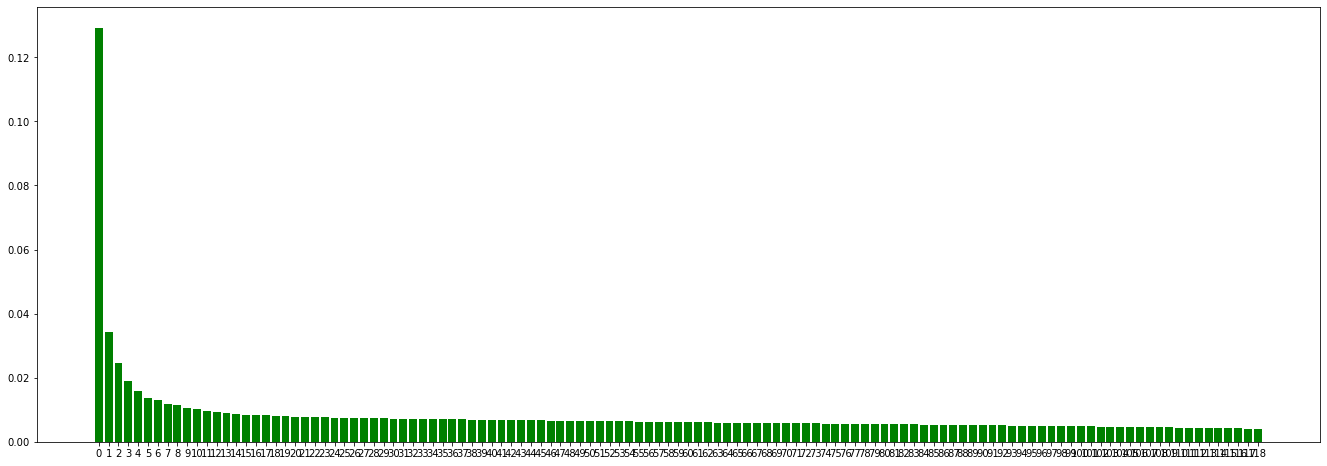

In [34]:
plt.figure(figsize=(23,8))
features_2 = range(pca_2.n_components_)
plt.bar(features_2, pca_2.explained_variance_ratio_, color = 'green')
plt.xticks(features_2)


In [31]:
print('Explained variation per PC: {}'.format(pca_2.explained_variance_ratio_))
print('Sum Explained var:', pca_2.explained_variance_ratio_.sum())
print('% information lost:', (1-pca_2.explained_variance_ratio_.sum()))

Explained variation per PC: [0.12924873 0.034416   0.02471911 0.0189325  0.01582632 0.01377299
 0.01296737 0.011761   0.01133971 0.01054893 0.01013876 0.0095299
 0.00924666 0.00885283 0.0085404  0.00837092 0.00827408 0.00825535
 0.00809353 0.00797717 0.00787771 0.00781151 0.00777519 0.00760075
 0.00753859 0.0074847  0.0073955  0.00736954 0.00732378 0.0072948
 0.00722577 0.00720722 0.00716007 0.00710207 0.00707013 0.00703506
 0.00697513 0.00696187 0.00695276 0.00687471 0.00682585 0.0068056
 0.00677384 0.00674684 0.00669706 0.00664821 0.00662285 0.00658385
 0.0065275  0.0064805  0.00646962 0.00640003 0.00638077 0.00635347
 0.00633983 0.00627419 0.00621455 0.00620549 0.00617934 0.00614049
 0.00608769 0.00606634 0.00602634 0.00601076 0.00598592 0.00597531
 0.00595509 0.00590752 0.00589049 0.00587636 0.00582988 0.00578019
 0.00576515 0.00572538 0.0057079  0.00568054 0.00563    0.00557525
 0.00555576 0.00551698 0.00549483 0.00548021 0.00542774 0.0054084
 0.00538724 0.00536901 0.00529816 0.00

## Clustering

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

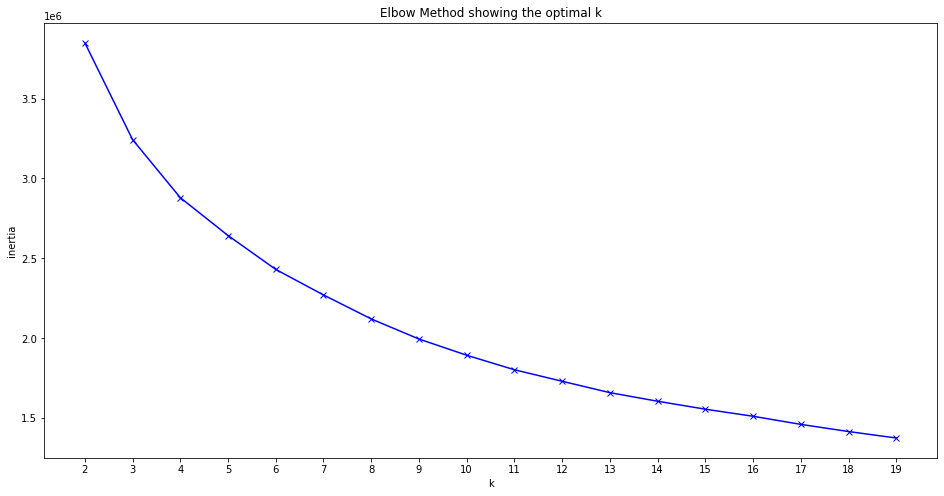

In [43]:
from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []
labels = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(PCA_components_2[[0,1,2,3,4]])
    inertia.append(kmeans.inertia_)
    labels.append(kmeans.labels_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [44]:
cluster_aisle = pd.concat([PCA_components_2[[0,1,2,3,4,5]],pd.Series(labels[6]).rename('cluster')], axis = 1)

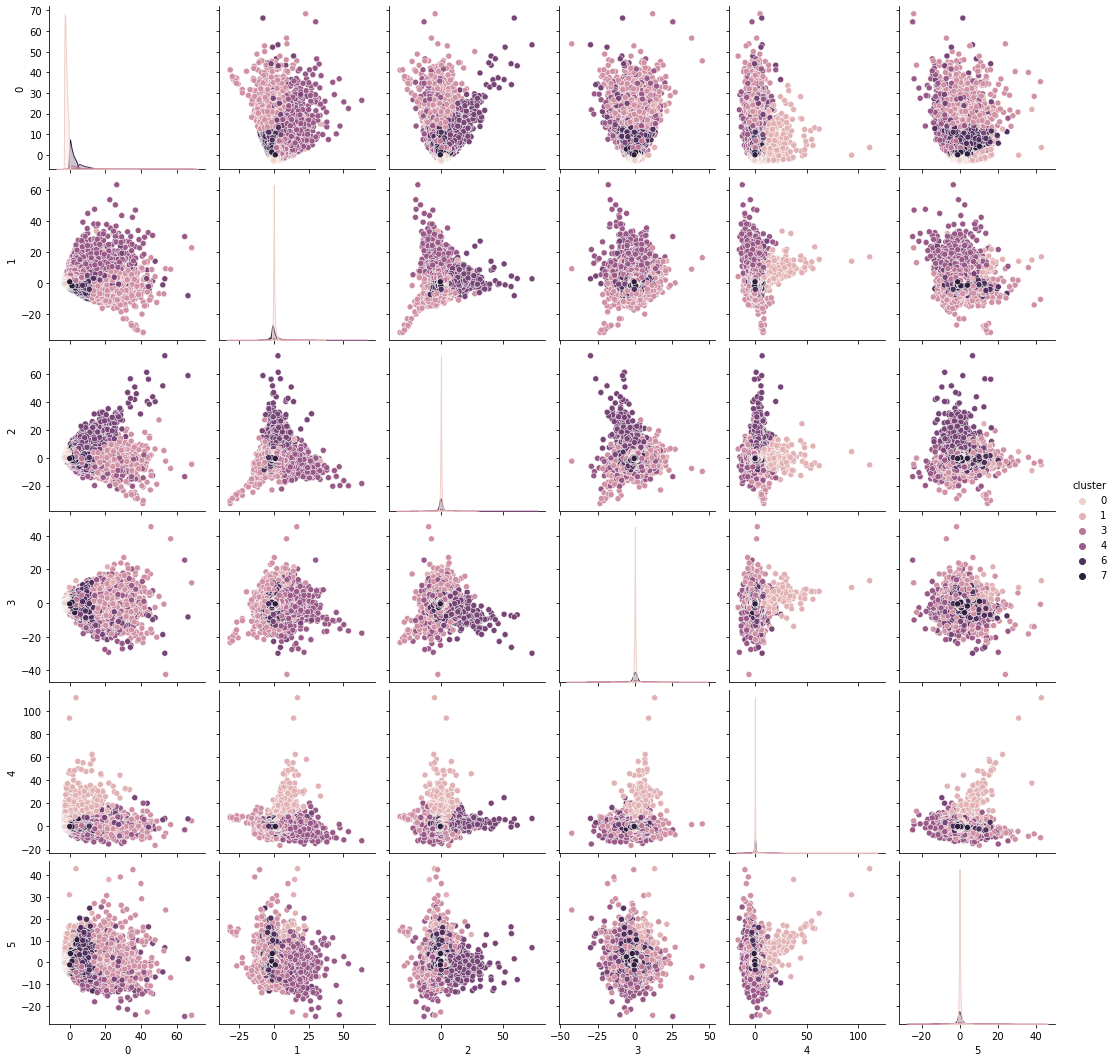

In [45]:
sns.pairplot(cluster_aisle, hue = 'cluster')

In [46]:
kmeans = KMeans(n_clusters=6, random_state=1234).fit(PCA_components_2[[0,1,2,3,4]])
clusters = kmeans.predict(PCA_components_2[[0,1,2,3,4]])
pd.Series(clusters).value_counts().sort_index()

0    139230
1     13604
2      1498
3      3249
4      4025
5     44603
dtype: int64